# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [2]:
# TODO
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data'
columns = ['Age', 'Year of Operation', 'Positive Nodes', 'Survival']
df = pd.read_csv(url, header=None, names=columns)
df.head(10)

,Age,Year of Operation,Positive Nodes,Survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


In [15]:
print(df.shape)
print(df.describe()) #shows I have the correct number of records, 306

(306, 4)
              Age  Year of Operation  Positive Nodes    Survival
count  306.000000         306.000000      306.000000  306.000000
mean    52.457516          62.852941        4.026144    1.264706
std     10.803452           3.249405        7.189654    0.441899
min     30.000000          58.000000        0.000000    1.000000
25%     44.000000          60.000000        0.000000    1.000000
50%     52.000000          63.000000        1.000000    1.000000
75%     60.750000          65.750000        4.000000    2.000000
max     83.000000          69.000000       52.000000    2.000000


In [17]:
df.isna().sum() #verifying no nulls, UCI says no missing values also

Age                  0
Year of Operation    0
Positive Nodes       0
Survival             0
dtype: int64

In [20]:
def change_to_0(elem):
    if elem == 2:
        elem = 0
    return elem

print(change_to_0(2))

0


In [21]:
df_copy = df

In [25]:
df_copy['Survival'] = df_copy['Survival'].apply(change_to_0)
df_copy.head(20)

,Age,Year of Operation,Positive Nodes,Survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,0
8,34,66,9,0
9,34,58,30,1


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [36]:
# TODO
df_copy.describe()

,Age,Year of Operation,Positive Nodes,Survival
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,0.735294
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,0.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,1.000000
max,83.000000,69.000000,52.000000,1.000000


In [39]:
pd.set_option('display.max_columns', 500)

In [40]:
age_bins = pd.cut(df_copy['Age'], 10)  # 10 equal-sized bins

In [71]:
ct = pd.crosstab(df_copy['Survival'], age_bins)
ct

Age,"(29.947, 35.3]","(35.3, 40.6]","(40.6, 45.9]","(45.9, 51.2]","(51.2, 56.5]","(56.5, 61.8]","(61.8, 67.1]","(67.1, 72.4]","(72.4, 77.7]","(77.7, 83.0]"
Survival,,,,,,,,,,
0,2,2,15,16,18,9,12,4,1,2
1,14,25,31,37,37,32,29,14,6,0


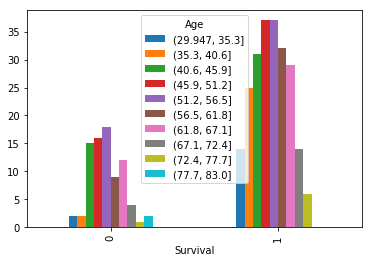

In [72]:
ct.plot(kind='bar');
plt.show()

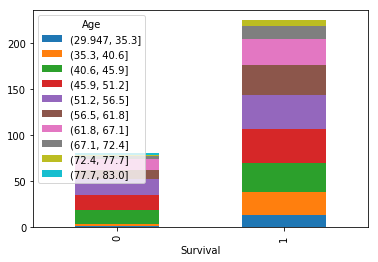

In [73]:
ct.plot(kind='bar', stacked=True);
plt.show()

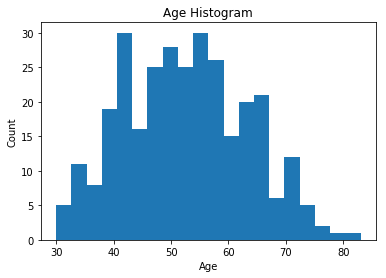

In [74]:
# Histogram
plt.hist(df_copy['Age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title("Age Histogram")
plt.show()

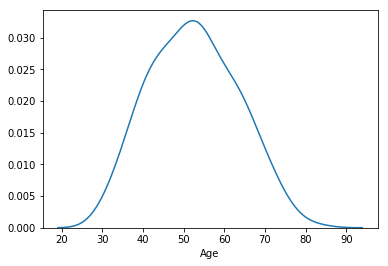

In [75]:
import seaborn as sns
sns.distplot(df_copy.Age, hist=False);
plt.show()

In [84]:
ct2 = pd.crosstab(df_copy['Survival'], df_copy['Positive Nodes'])
ct2

Positive Nodes,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,28,30,35,46,52
Survival,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,19,8,5,7,3,4,3,2,2,4,1,3,1,4,1,2,0,1,0,2,1,1,1,3,1,0,0,0,1,0,1
1,117,33,15,13,10,2,4,5,5,2,2,1,1,1,3,1,1,0,1,1,1,0,2,0,0,1,1,1,0,1,0


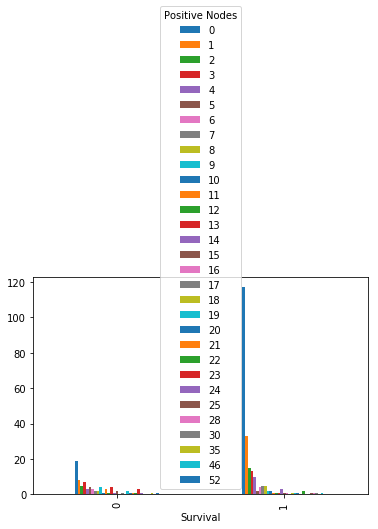

In [85]:
ct2.plot(kind='bar');
plt.show()

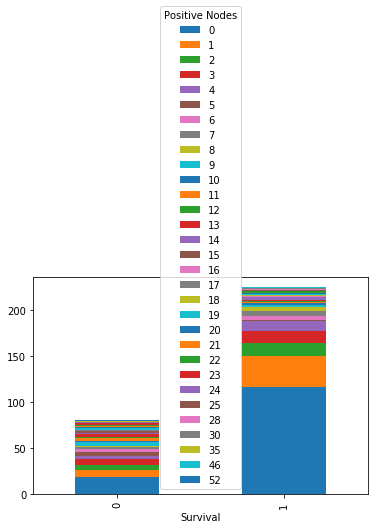

In [88]:
ct2.plot(kind='bar', stacked=True);
plt.show()

In [89]:
ct3 = pd.crosstab(df_copy['Survival'], df_copy['Year of Operation'])
ct3

Year of Operation,58,59,60,61,62,63,64,65,66,67,68,69
Survival,,,,,,,,,,,,
0,12,9,4,3,7,8,8,13,6,4,3,4
1,24,18,24,23,16,22,23,15,22,21,10,7


In [91]:
year_bins = pd.cut(df_copy['Year of Operation'], 10)  # 10 equal-sized bins
ct4 = pd.crosstab(year_bins, df_copy['Positive Nodes'])
ct4

Positive Nodes,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,28,30,35,46,52
Year of Operation,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"(57.989, 59.1]",24,7,11,5,2,0,1,1,2,1,1,2,0,2,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
"(59.1, 60.2]",11,7,1,2,2,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
"(60.2, 61.3]",11,4,2,0,1,1,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
"(61.3, 62.4]",9,3,1,3,0,2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0
"(62.4, 63.5]",14,4,1,1,2,0,2,0,0,0,0,0,0,1,1,0,0,0,0,2,0,0,0,1,1,0,0,0,0,0,0
"(63.5, 64.6]",17,4,1,1,1,0,1,2,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"(64.6, 65.7]",13,2,0,2,2,1,1,0,1,1,0,0,1,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0
"(65.7, 66.8]",15,3,1,1,2,0,0,0,0,1,0,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
"(66.8, 67.9]",11,5,1,2,0,1,0,2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?
- What is at least one feature that looks to have a negative relationship with survival?
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

One feature that looks to have a positive relationship with survival is the "Year of Operation". As we move further into the futre there seems to be few instances of individuals dying within five years of operation. This could possibly be due to advances in science and technology.

The feature "Positive Nodes" seems to have a slight negative relationship with survival. As the number of positive nodes increases, survival rate seems to decrease.

Over time there seemed to be fewer instances of positive nodes as years increase. This may suggest better living conditions over time however, further analysis and hypothesis testing is required.